CITATION
Rezapour M, Walker SJ, Ornelles DA, Niazi MKK,
McNutt PM, Atala A and Gurcan MN (2024), A
comparative analysis of RNA-Seq and
NanoString technologies in deciphering viral
infection response in upper airway
lung organoids.
Front. Genet. 15:1327984.
doi: 10.3389/fgene.2024.1327984


For Code-related questions, Please contact Dr. Mostafa Rezapour: mrezapou@wakehealth.edu




In [55]:
keys = [('IAV_UV_24', 'IAV_none_24'),('MPV_UV_24', 'MPV_none_24'),('PIV3_UV_24', 'PIV3_none_24'),
        ('IAV_UV_72', 'IAV_none_72'),('MPV_UV_72', 'MPV_none_72'),('PIV3_UV_72', 'PIV3_none_72'),
        ('mock_none_24', 'IAV_none_24'),('mock_none_24', 'MPV_none_24'),('mock_none_24', 'PIV3_none_24'),
        ('mock_none_72', 'IAV_none_72'),('mock_none_72', 'MPV_none_72'),('mock_none_72', 'PIV3_none_72')]

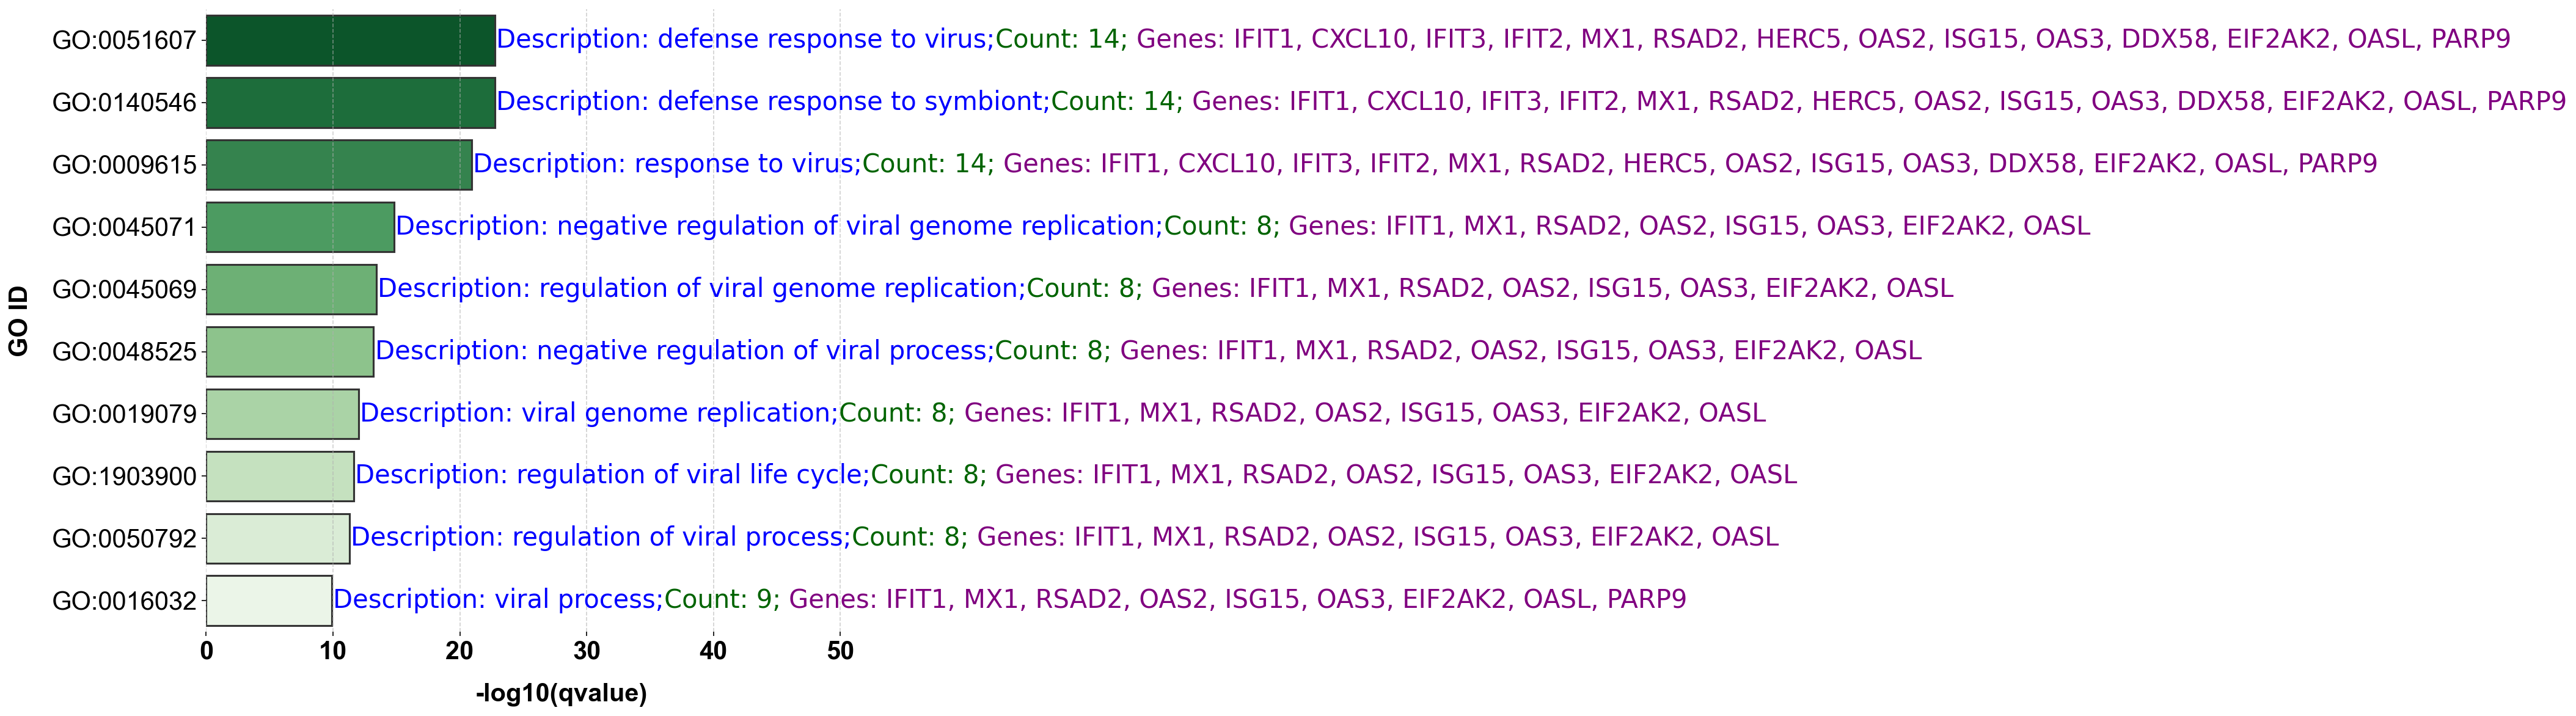

In [57]:




key=('mock_none_24', 'PIV3_none_24')

df_RNA = output_dict_RNA[key]
df_Nano = output_dict_Nano[key]

# Filter rows where 'BH_adjusted (PValue)' is less than 0.05
sig_genes_RNA = df_RNA[df_RNA['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']
sig_genes_Nano = df_Nano[df_Nano['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']

# Find common significant genes
common_genes = set(sig_genes_RNA).intersection(set(sig_genes_Nano))
common_genes=list(common_genes)
Nano_data=df_Nano[['Gene Symbol','Regulation']]
RNA_data=df_RNA[['Gene Symbol','Regulation']]
filtered_Nano = Nano_data[Nano_data['Gene Symbol'].isin(common_genes)]
filtered_RNA = RNA_data[RNA_data['Gene Symbol'].isin(common_genes)]
common_genes_df = pd.merge(filtered_Nano, filtered_RNA, on=['Gene Symbol', 'Regulation'])
common_genes_df.to_csv('mock_none_24_vs_PIV3_none_24.csv', index=False)









import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations





import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations

up_GO = "Detailed_GO_Upregulated_mock_none_24_vs_PIV3_none_24.csv"
#down_GO = "Detailed_GO_Downregulated_mock_none_24_vs_PIV3_none_24.csv"

# Read the CSV files
upregulated_GO = pd.read_csv(up_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)
#downregulated_GO = pd.read_csv(down_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)


upregulated_GO_filtered = upregulated_GO[upregulated_GO['qvalue'] < 0.05]
#downregulated_GO_filtered = downregulated_GO[downregulated_GO['qvalue'] < 0.05]



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def insert_newlines(string, every=15):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, .9*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()



    



# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=upregulated_GO_filtered

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 55

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)





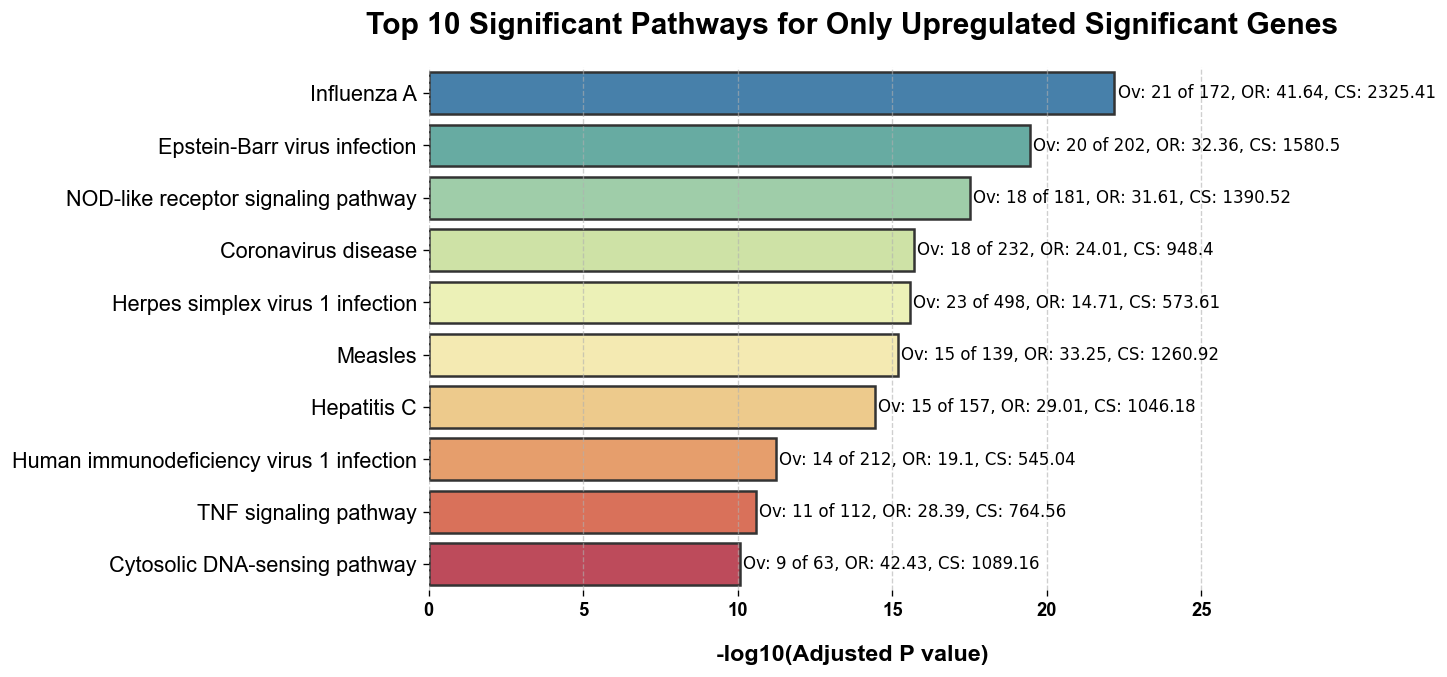

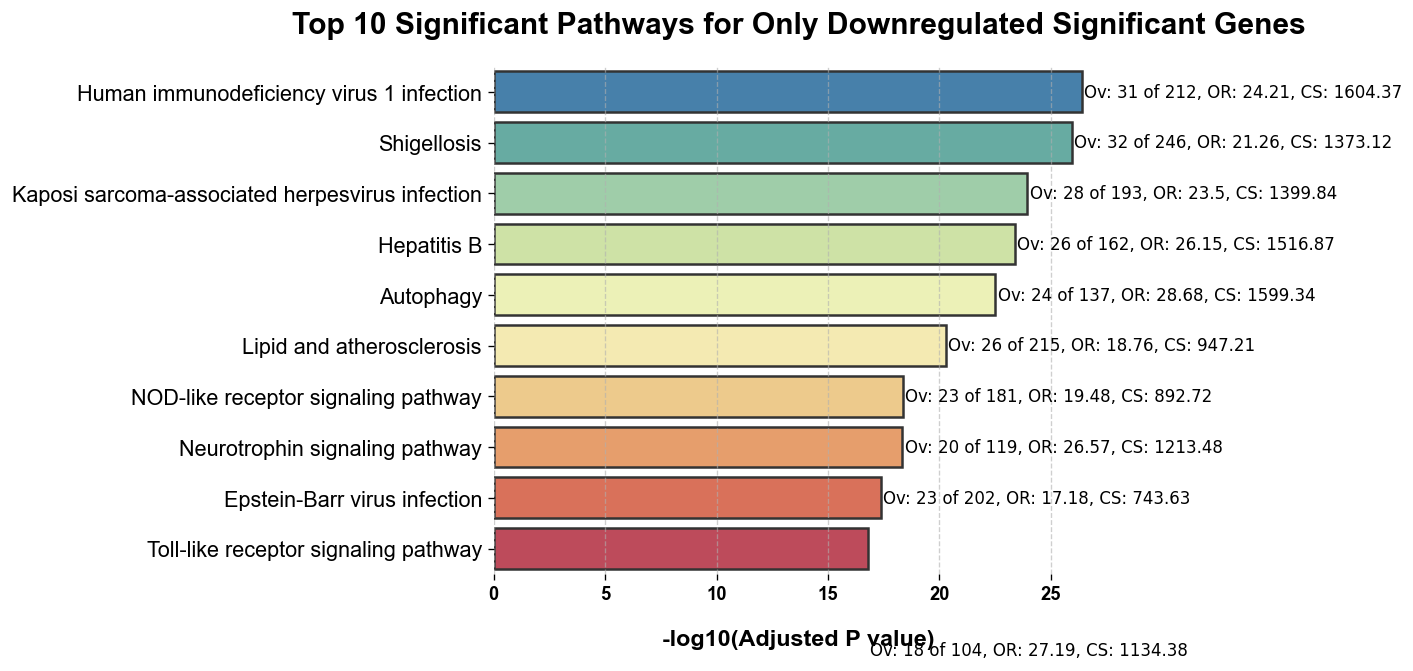

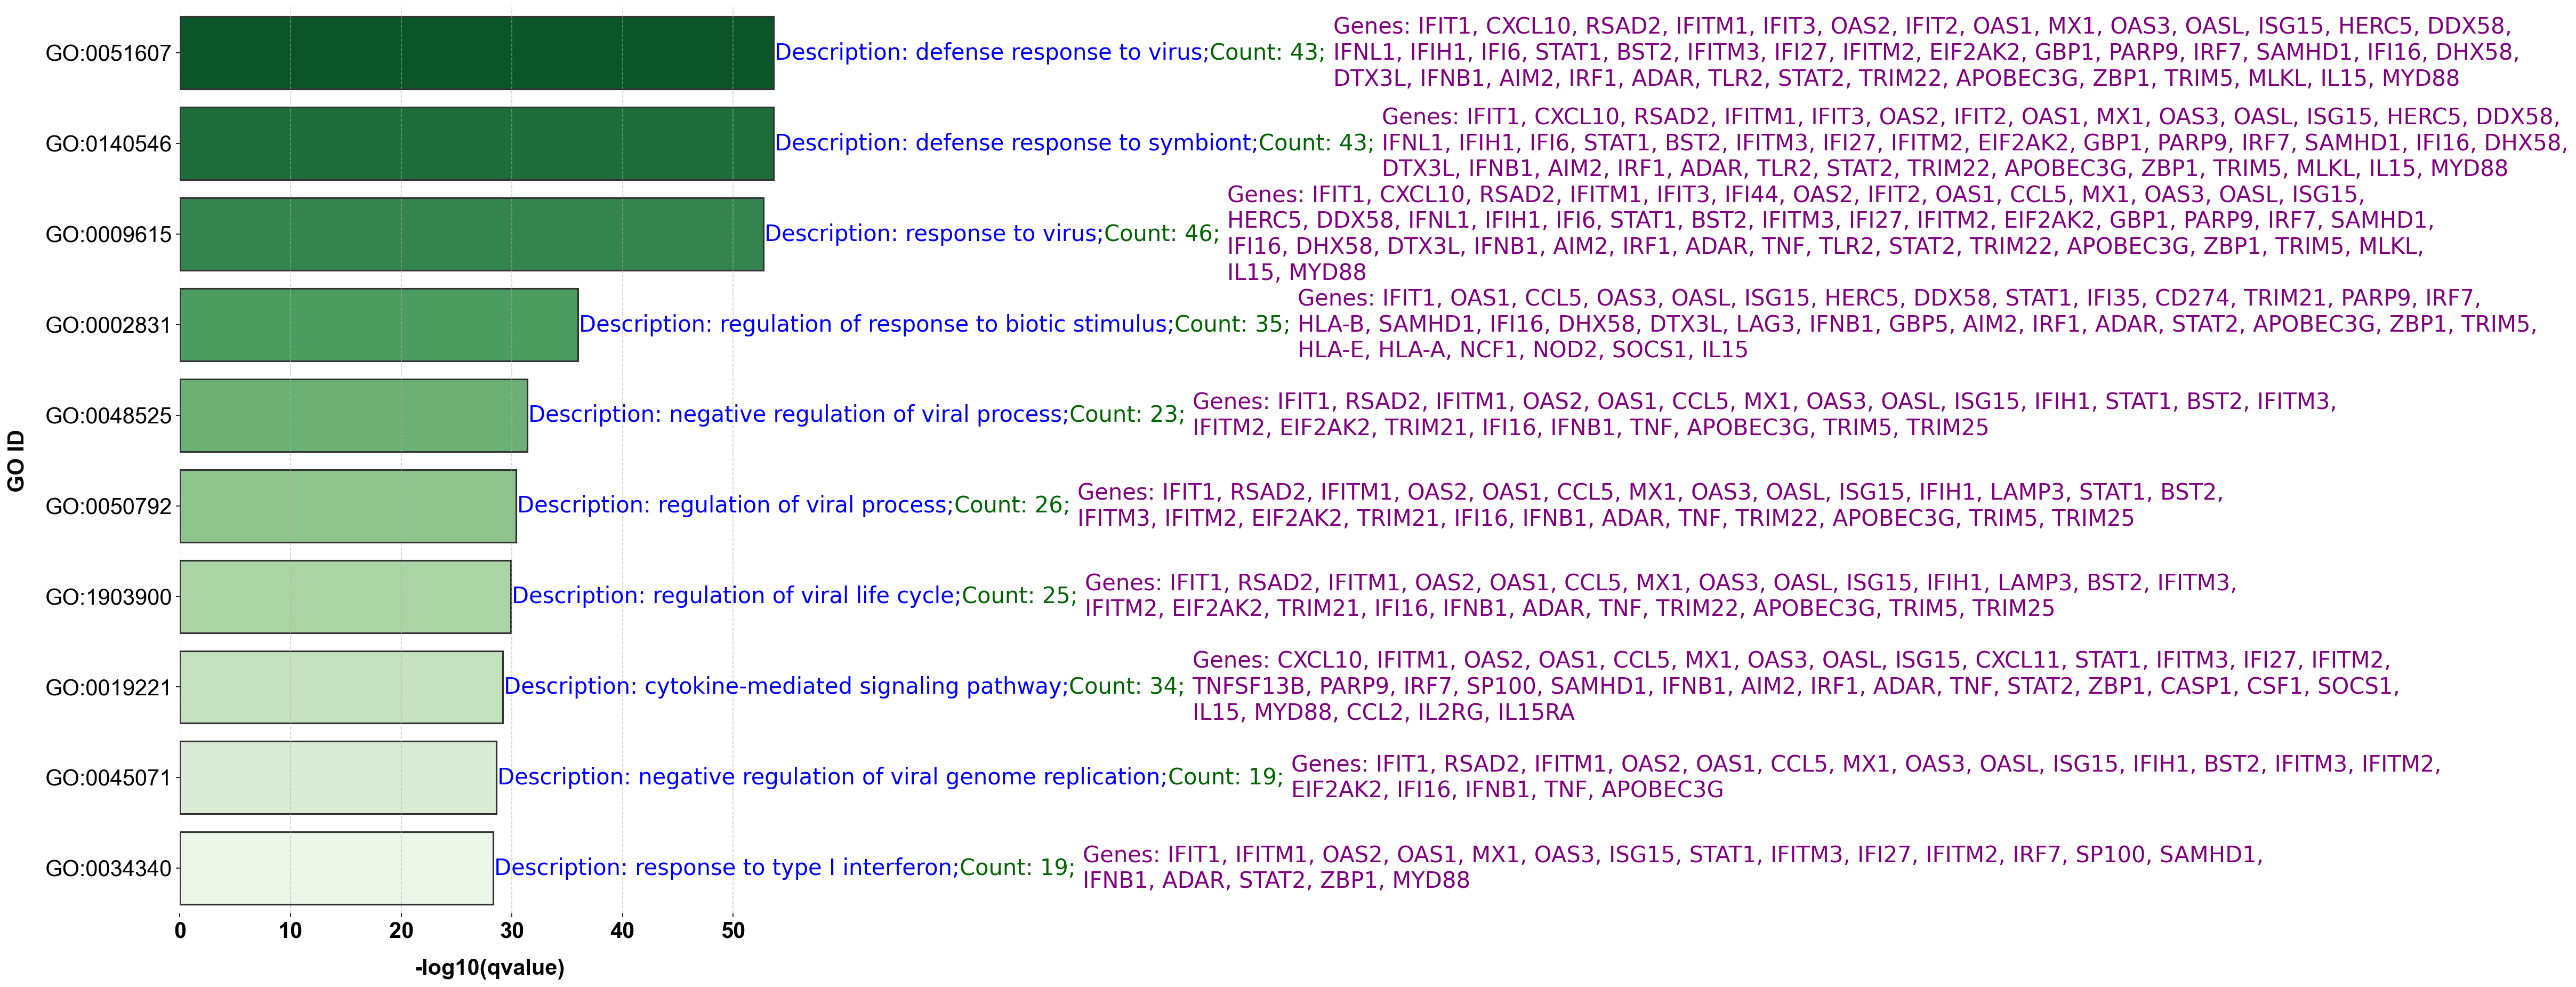

In [58]:




key=('mock_none_72', 'IAV_none_72')

df_RNA = output_dict_RNA[key]
df_Nano = output_dict_Nano[key]

# Filter rows where 'BH_adjusted (PValue)' is less than 0.05
sig_genes_RNA = df_RNA[df_RNA['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']
sig_genes_Nano = df_Nano[df_Nano['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']

# Find common significant genes
common_genes = set(sig_genes_RNA).intersection(set(sig_genes_Nano))
common_genes=list(common_genes)
Nano_data=df_Nano[['Gene Symbol','Regulation']]
RNA_data=df_RNA[['Gene Symbol','Regulation']]
filtered_Nano = Nano_data[Nano_data['Gene Symbol'].isin(common_genes)]
filtered_RNA = RNA_data[RNA_data['Gene Symbol'].isin(common_genes)]
common_genes_df = pd.merge(filtered_Nano, filtered_RNA, on=['Gene Symbol', 'Regulation'])
common_genes_df.to_csv('mock_none_72_vs_IAV_none_72.csv', index=False)









import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations


upregulated_path = "Pathway_Upregulated_mock_none_72_vs_IAV_none_72.csv"
downregulated_path = "Pathway_Downregulated_mock_none_72_vs_IAV_none_72.csv"

# Read the CSV files
upregulated_df = pd.read_csv(upregulated_path)
downregulated_df = pd.read_csv(downregulated_path)

# Function to clean up dataframes
def clean_dataframe(df):
    # Remove specified columns
    df = df.drop(columns=['Old.P.value', 'Old.Adjusted.P.value'], errors='ignore')
    
    # Replace dots in column names with spaces
    df.columns = [col.replace('.', ' ') for col in df.columns]
    
    # Calculate -log10 of adjusted p-values for visualization purposes
    df["-log10(Adjusted P value)"] = -np.log10(df["Adjusted P value"])
    
    return df

# Clean up the dataframes
upregulated_df = clean_dataframe(upregulated_df)
downregulated_df = clean_dataframe(downregulated_df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_max_log_pvalue(upregulated_df, downregulated_df):
    """
    Finds the maximum -log10(Adjusted P value) from both upregulated and downregulated datasets.
    """
    max_upregulated = upregulated_df["-log10(Adjusted P value)"].max()
    max_downregulated = downregulated_df["-log10(Adjusted P value)"].max()
    return max(max_upregulated, max_downregulated)

def plot_pathways(df, regulation_type, max_log_pvalue, top_n=20):
    """
    Plots top N significant pathways, ensuring the x-axis is normalized across upregulated and downregulated figures.
    """
    title = f"Top {top_n} Significant Pathways for {regulation_type} Genes"
    significant_df = df[df['Adjusted P value'] < 0.05].sort_values('Adjusted P value').head(top_n)
    
    if significant_df.empty:
        print(f"No significant pathways found for {regulation_type} genes.")
        return
    
    plt.figure(figsize=(12, 0.6 * len(significant_df)), dpi=120)  # Increased DPI for clarity
    barplot = sns.barplot(data=significant_df, y='Term', x='-log10(Adjusted P value)', palette='Spectral_r', edgecolor='.2', linewidth=1.5)
    
    # Set the x-axis limit to the maximum -log10(Adjusted P value) found in either dataset
    plt.xlim(0, max_log_pvalue + 1)
    
    for index, row in significant_df.iterrows():
        barplot.text(row['-log10(Adjusted P value)'] + 0.1, index,
                     f"Ov: {row['Overlap']}, OR: {np.round(row['Odds Ratio'], 2)}, CS: {np.round(row['Combined Score'], 2)}",
                     color='black', va='center', fontsize=10, ha='left')
    
    plt.title(title, fontsize=18, pad=20, fontweight='bold', fontname='Arial')
    plt.xlabel('-log10(Adjusted P value)', fontsize=14, labelpad=15, fontweight='bold', fontname='Arial')
    plt.ylabel('')
    plt.xticks(fontsize=11, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=13, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)

# Determine the maximum -log10(Adjusted P value) to normalize the x-axis
max_log_pvalue = find_max_log_pvalue(upregulated_df, downregulated_df)

# Plot the figures
plot_pathways(upregulated_df, 'Only Upregulated Significant', max_log_pvalue, top_n=10)
plot_pathways(downregulated_df, 'Only Downregulated Significant', max_log_pvalue, top_n=10)



import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations


up_GO = "Detailed_GO_Upregulated_mock_none_72_vs_IAV_none_72.csv"
down_GO = "Detailed_GO_Downregulated_mock_none_72_vs_IAV_none_72.csv"

# Read the CSV files
upregulated_GO = pd.read_csv(up_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)
downregulated_GO = pd.read_csv(down_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)


upregulated_GO_filtered = upregulated_GO[upregulated_GO['qvalue'] < 0.05]
downregulated_GO_filtered = downregulated_GO[downregulated_GO['qvalue'] < 0.05]



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def insert_newlines(string, every=15):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, 1.5*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()



    



# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=upregulated_GO_filtered

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 55

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)





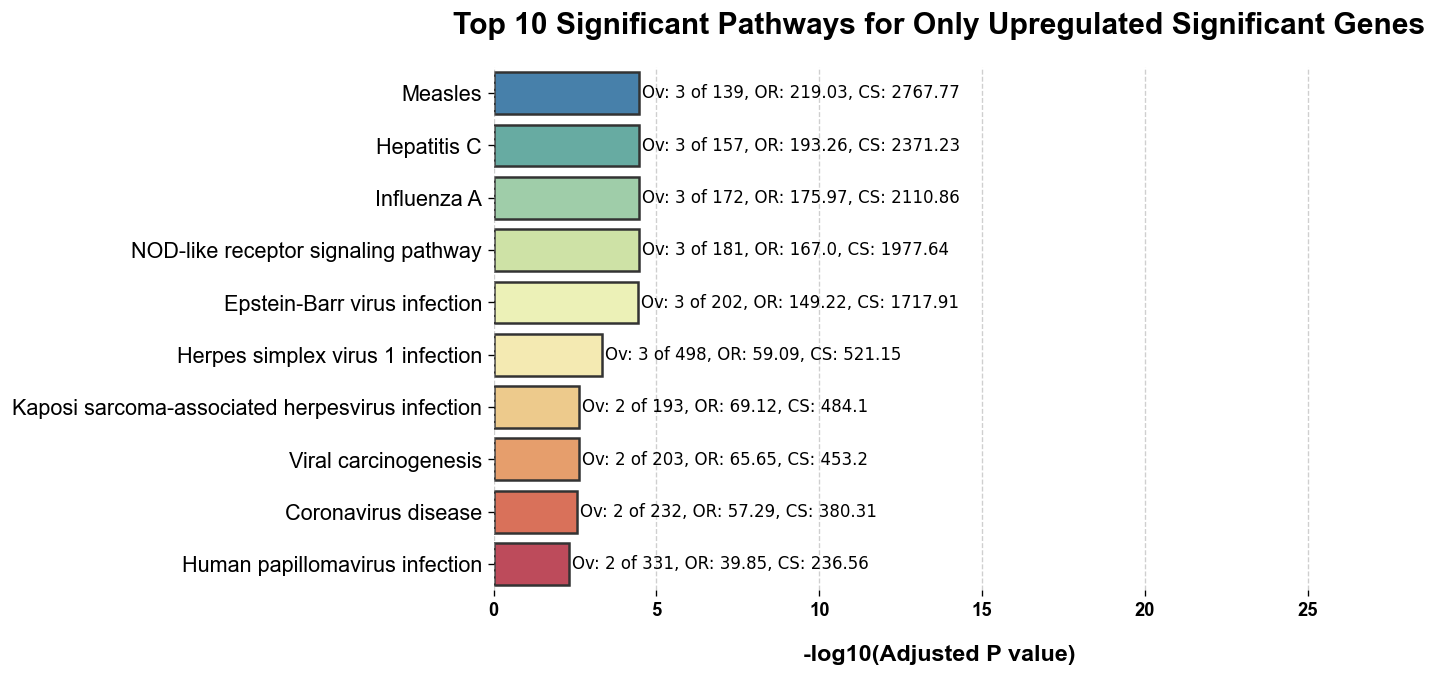

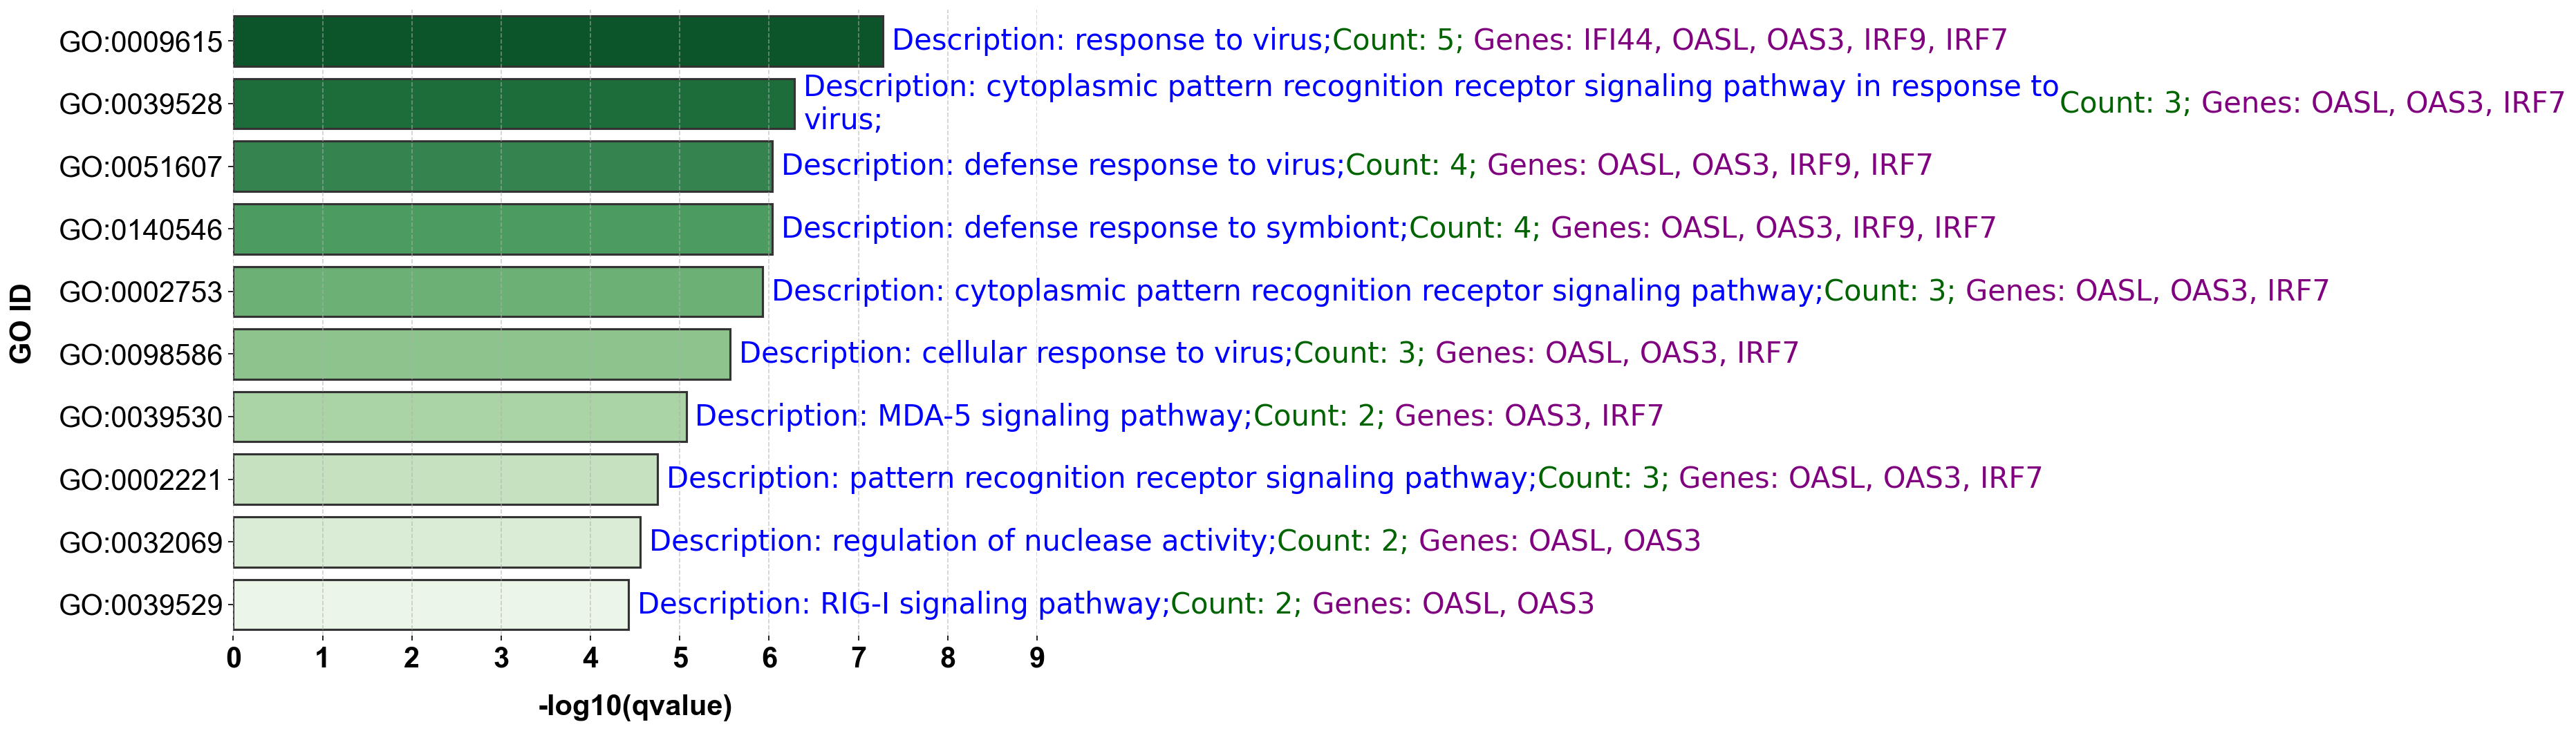

In [59]:




key=('mock_none_72', 'MPV_none_72')

df_RNA = output_dict_RNA[key]
df_Nano = output_dict_Nano[key]

# Filter rows where 'BH_adjusted (PValue)' is less than 0.05
sig_genes_RNA = df_RNA[df_RNA['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']
sig_genes_Nano = df_Nano[df_Nano['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']

# Find common significant genes
common_genes = set(sig_genes_RNA).intersection(set(sig_genes_Nano))
common_genes=list(common_genes)
Nano_data=df_Nano[['Gene Symbol','Regulation']]
RNA_data=df_RNA[['Gene Symbol','Regulation']]
filtered_Nano = Nano_data[Nano_data['Gene Symbol'].isin(common_genes)]
filtered_RNA = RNA_data[RNA_data['Gene Symbol'].isin(common_genes)]
common_genes_df = pd.merge(filtered_Nano, filtered_RNA, on=['Gene Symbol', 'Regulation'])
common_genes_df.to_csv('mock_none_72_vs_MPV_none_72.csv', index=False)









import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations

upregulated_path = "Pathway_Upregulated_mock_none_72_vs_MPV_none_72.csv"
#downregulated_path = "Pathway_Downregulated_mock_none_72_vs_MPV_none_72.csv"

# Read the CSV files
upregulated_df = pd.read_csv(upregulated_path)
#downregulated_df = pd.read_csv(downregulated_path)

# Function to clean up dataframes
def clean_dataframe(df):
    # Remove specified columns
    df = df.drop(columns=['Old.P.value', 'Old.Adjusted.P.value'], errors='ignore')
    
    # Replace dots in column names with spaces
    df.columns = [col.replace('.', ' ') for col in df.columns]
    
    # Calculate -log10 of adjusted p-values for visualization purposes
    df["-log10(Adjusted P value)"] = -np.log10(df["Adjusted P value"])
    
    return df

# Clean up the dataframes
upregulated_df = clean_dataframe(upregulated_df)
#downregulated_df = clean_dataframe(downregulated_df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_max_log_pvalue(upregulated_df, downregulated_df):
    """
    Finds the maximum -log10(Adjusted P value) from both upregulated and downregulated datasets.
    """
    max_upregulated = upregulated_df["-log10(Adjusted P value)"].max()
    max_downregulated = downregulated_df["-log10(Adjusted P value)"].max()
    return max(max_upregulated, max_downregulated)

def plot_pathways(df, regulation_type, max_log_pvalue, top_n=20):
    """
    Plots top N significant pathways, ensuring the x-axis is normalized across upregulated and downregulated figures.
    """
    title = f"Top {top_n} Significant Pathways for {regulation_type} Genes"
    significant_df = df[df['Adjusted P value'] < 0.05].sort_values('Adjusted P value').head(top_n)
    
    if significant_df.empty:
        print(f"No significant pathways found for {regulation_type} genes.")
        return
    
    plt.figure(figsize=(12, 0.6 * len(significant_df)), dpi=120)  # Increased DPI for clarity
    barplot = sns.barplot(data=significant_df, y='Term', x='-log10(Adjusted P value)', palette='Spectral_r', edgecolor='.2', linewidth=1.5)
    
    # Set the x-axis limit to the maximum -log10(Adjusted P value) found in either dataset
    plt.xlim(0, max_log_pvalue + 1)
    
    for index, row in significant_df.iterrows():
        barplot.text(row['-log10(Adjusted P value)'] + 0.1, index,
                     f"Ov: {row['Overlap']}, OR: {np.round(row['Odds Ratio'], 2)}, CS: {np.round(row['Combined Score'], 2)}",
                     color='black', va='center', fontsize=10, ha='left')
    
    plt.title(title, fontsize=18, pad=20, fontweight='bold', fontname='Arial')
    plt.xlabel('-log10(Adjusted P value)', fontsize=14, labelpad=15, fontweight='bold', fontname='Arial')
    plt.ylabel('')
    plt.xticks(fontsize=11, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=13, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)

# Determine the maximum -log10(Adjusted P value) to normalize the x-axis
max_log_pvalue = find_max_log_pvalue(upregulated_df, downregulated_df)

# Plot the figures
plot_pathways(upregulated_df, 'Only Upregulated Significant', max_log_pvalue, top_n=10)
#plot_pathways(downregulated_df, 'Only Downregulated Significant', max_log_pvalue, top_n=10)



import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations

up_GO = "Detailed_GO_Upregulated_mock_none_72_vs_MPV_none_72.csv"
#down_GO = "Detailed_GO_Downregulated_mock_none_72_vs_MPV_none_72.csv"

# Read the CSV files
upregulated_GO = pd.read_csv(up_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)
#downregulated_GO = pd.read_csv(down_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)


upregulated_GO_filtered = upregulated_GO[upregulated_GO['qvalue'] < 0.05]
#downregulated_GO_filtered = downregulated_GO[downregulated_GO['qvalue'] < 0.05]



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def insert_newlines(string, every=10):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, .8*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()




    



# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=upregulated_GO_filtered

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 8

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)





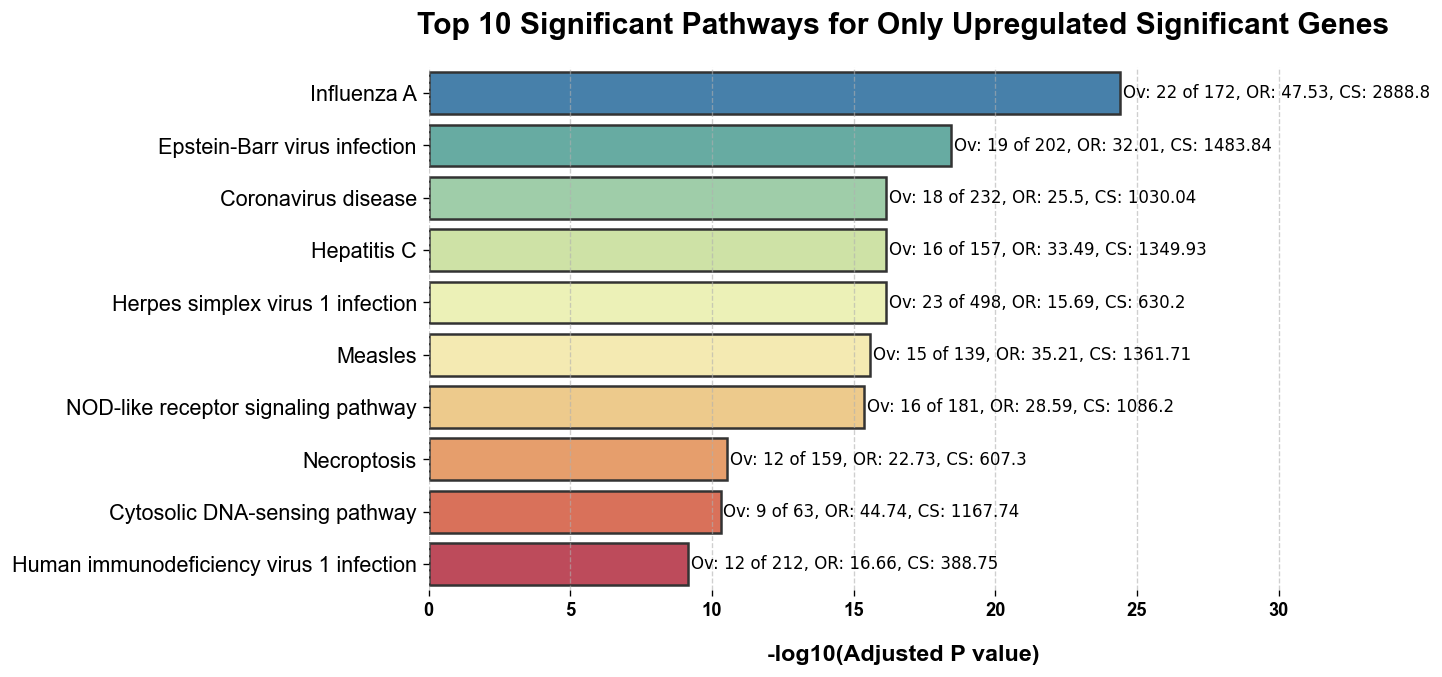

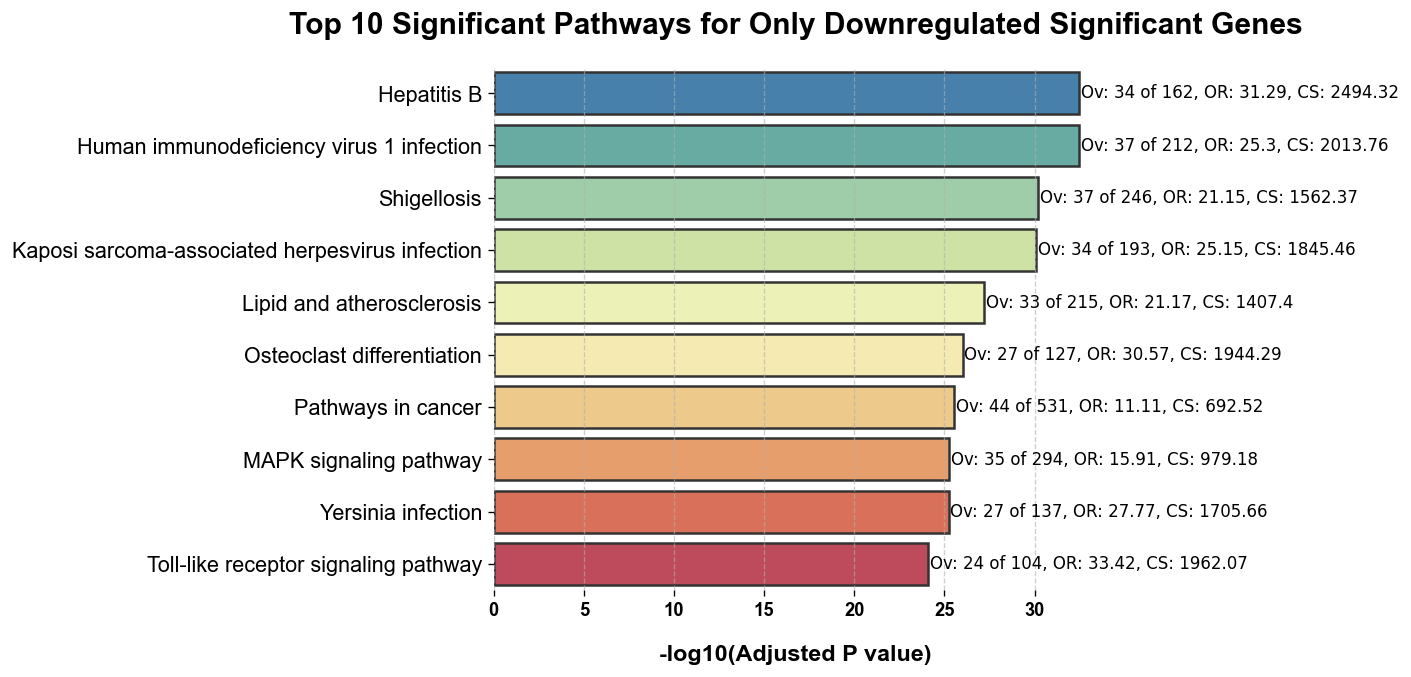

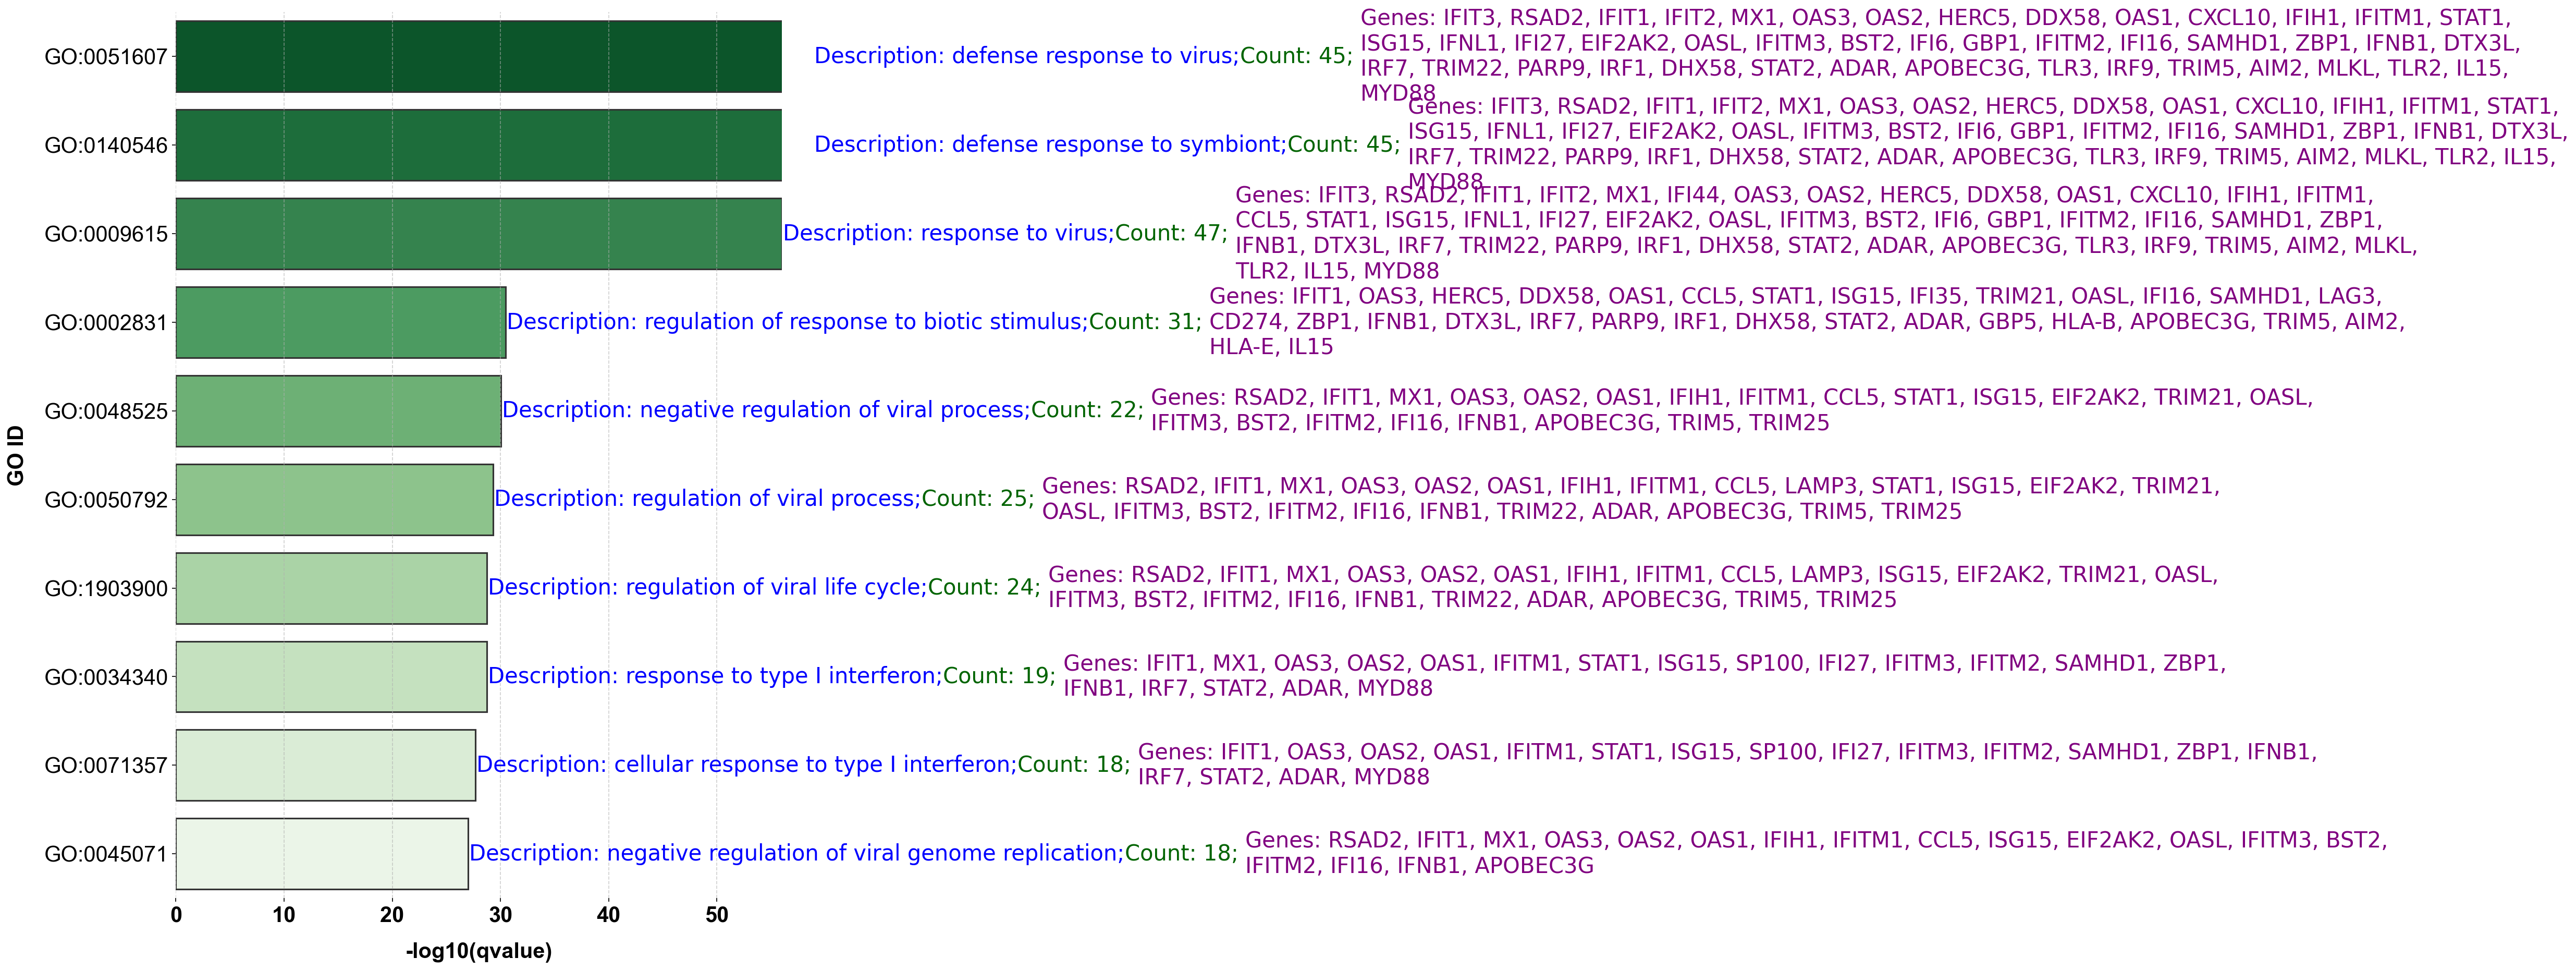

In [60]:




key=('mock_none_72', 'PIV3_none_72')

df_RNA = output_dict_RNA[key]
df_Nano = output_dict_Nano[key]

# Filter rows where 'BH_adjusted (PValue)' is less than 0.05
sig_genes_RNA = df_RNA[df_RNA['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']
sig_genes_Nano = df_Nano[df_Nano['BH_adjusted (PValue)'] < 0.05]['Gene Symbol']

# Find common significant genes
common_genes = set(sig_genes_RNA).intersection(set(sig_genes_Nano))
common_genes=list(common_genes)
Nano_data=df_Nano[['Gene Symbol','Regulation']]
RNA_data=df_RNA[['Gene Symbol','Regulation']]
filtered_Nano = Nano_data[Nano_data['Gene Symbol'].isin(common_genes)]
filtered_RNA = RNA_data[RNA_data['Gene Symbol'].isin(common_genes)]
common_genes_df = pd.merge(filtered_Nano, filtered_RNA, on=['Gene Symbol', 'Regulation'])
common_genes_df.to_csv('mock_none_72_vs_PIV3_none_72.csv', index=False)









import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations

upregulated_path = "Pathway_Upregulated_mock_none_72_vs_PIV3_none_72.csv"
downregulated_path = "Pathway_Downregulated_mock_none_72_vs_PIV3_none_72.csv"

# Read the CSV files
upregulated_df = pd.read_csv(upregulated_path)
downregulated_df = pd.read_csv(downregulated_path)

# Function to clean up dataframes
def clean_dataframe(df):
    # Remove specified columns
    df = df.drop(columns=['Old.P.value', 'Old.Adjusted.P.value'], errors='ignore')
    
    # Replace dots in column names with spaces
    df.columns = [col.replace('.', ' ') for col in df.columns]
    
    # Calculate -log10 of adjusted p-values for visualization purposes
    df["-log10(Adjusted P value)"] = -np.log10(df["Adjusted P value"])
    
    return df

# Clean up the dataframes
upregulated_df = clean_dataframe(upregulated_df)
downregulated_df = clean_dataframe(downregulated_df)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def find_max_log_pvalue(upregulated_df, downregulated_df):
    """
    Finds the maximum -log10(Adjusted P value) from both upregulated and downregulated datasets.
    """
    max_upregulated = upregulated_df["-log10(Adjusted P value)"].max()
    max_downregulated = downregulated_df["-log10(Adjusted P value)"].max()
    return max(max_upregulated, max_downregulated)

def plot_pathways(df, regulation_type, max_log_pvalue, top_n=20):
    """
    Plots top N significant pathways, ensuring the x-axis is normalized across upregulated and downregulated figures.
    """
    title = f"Top {top_n} Significant Pathways for {regulation_type} Genes"
    significant_df = df[df['Adjusted P value'] < 0.05].sort_values('Adjusted P value').head(top_n)
    
    if significant_df.empty:
        print(f"No significant pathways found for {regulation_type} genes.")
        return
    
    plt.figure(figsize=(12, 0.6 * len(significant_df)), dpi=120)  # Increased DPI for clarity
    barplot = sns.barplot(data=significant_df, y='Term', x='-log10(Adjusted P value)', palette='Spectral_r', edgecolor='.2', linewidth=1.5)
    
    # Set the x-axis limit to the maximum -log10(Adjusted P value) found in either dataset
    plt.xlim(0, max_log_pvalue + 1)
    
    for index, row in significant_df.iterrows():
        barplot.text(row['-log10(Adjusted P value)'] + 0.1, index,
                     f"Ov: {row['Overlap']}, OR: {np.round(row['Odds Ratio'], 2)}, CS: {np.round(row['Combined Score'], 2)}",
                     color='black', va='center', fontsize=10, ha='left')
    
    plt.title(title, fontsize=18, pad=20, fontweight='bold', fontname='Arial')
    plt.xlabel('-log10(Adjusted P value)', fontsize=14, labelpad=15, fontweight='bold', fontname='Arial')
    plt.ylabel('')
    plt.xticks(fontsize=11, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=13, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)

# Determine the maximum -log10(Adjusted P value) to normalize the x-axis
max_log_pvalue = find_max_log_pvalue(upregulated_df, downregulated_df)

# Plot the figures
plot_pathways(upregulated_df, 'Only Upregulated Significant', max_log_pvalue, top_n=10)
plot_pathways(downregulated_df, 'Only Downregulated Significant', max_log_pvalue, top_n=10)



import pandas as pd
import numpy as np  # Ensure numpy is imported for calculations


up_GO = "Detailed_GO_Upregulated_mock_none_72_vs_PIV3_none_72.csv"
down_GO = "Detailed_GO_Downregulated_mock_none_72_vs_PIV3_none_72.csv"

# Read the CSV files
upregulated_GO = pd.read_csv(up_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)
downregulated_GO = pd.read_csv(down_GO).drop(['geneID','Unnamed: 0','p.adjust'],axis=1)


upregulated_GO_filtered = upregulated_GO[upregulated_GO['qvalue'] < 0.05]
downregulated_GO_filtered = downregulated_GO[downregulated_GO['qvalue'] < 0.05]



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def insert_newlines(string, every=15):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, 1.5*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()




    



# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=upregulated_GO_filtered

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 55

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)





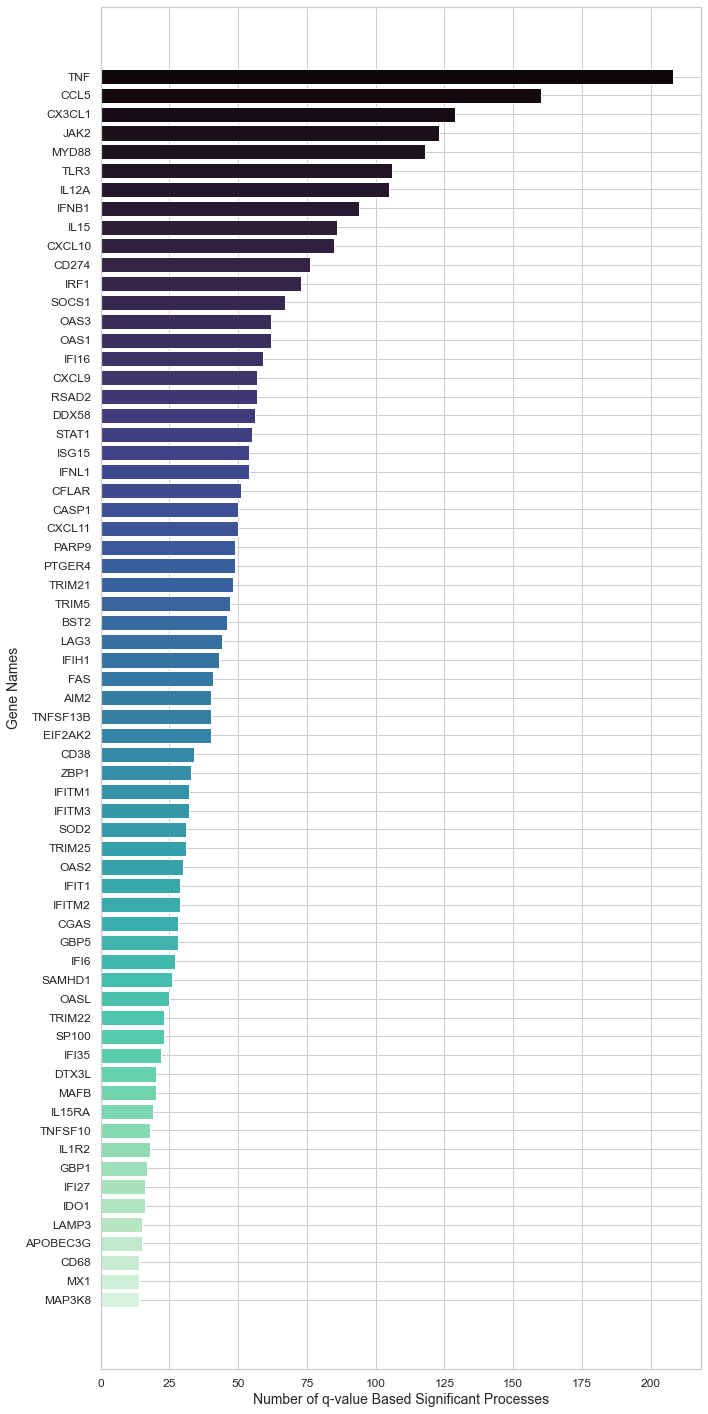

In [61]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Detailed_GO_Upregulated_mock_none_24_vs_IAV_none_24.csv')

# Parse GeneSymbols
df['GeneSymbols'] = df['GeneSymbols'].apply(lambda x: x.split(', '))

# Flatten the list of genes and count occurrences
all_genes = [gene for sublist in df['GeneSymbols'] for gene in sublist]
gene_count = Counter(all_genes)

# Create DataFrame from the counter for easier plotting
gene_df = pd.DataFrame(list(gene_count.items()), columns=['Gene', 'Number of Processes']).sort_values(by='Number of Processes', ascending=True)

# Filter to show only genes appearing in more than 10 processes
filtered_gene_df = gene_df[gene_df['Number of Processes'] > 10]

# Enhancing the plot with seaborn for a more modern look
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, max(7, len(filtered_gene_df) * 0.3)))  # Dynamic height based on number of genes
plt.barh(filtered_gene_df['Gene'], filtered_gene_df['Number of Processes'], color=sns.color_palette("mako_r", n_colors=len(filtered_gene_df)))
#plt.title('Number of GO Processes Each Gene Appears In (More than 10 processes)', fontsize=16)
plt.xlabel('Number of q-value Based Significant Processes', fontsize=14)
plt.ylabel('Gene Names', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


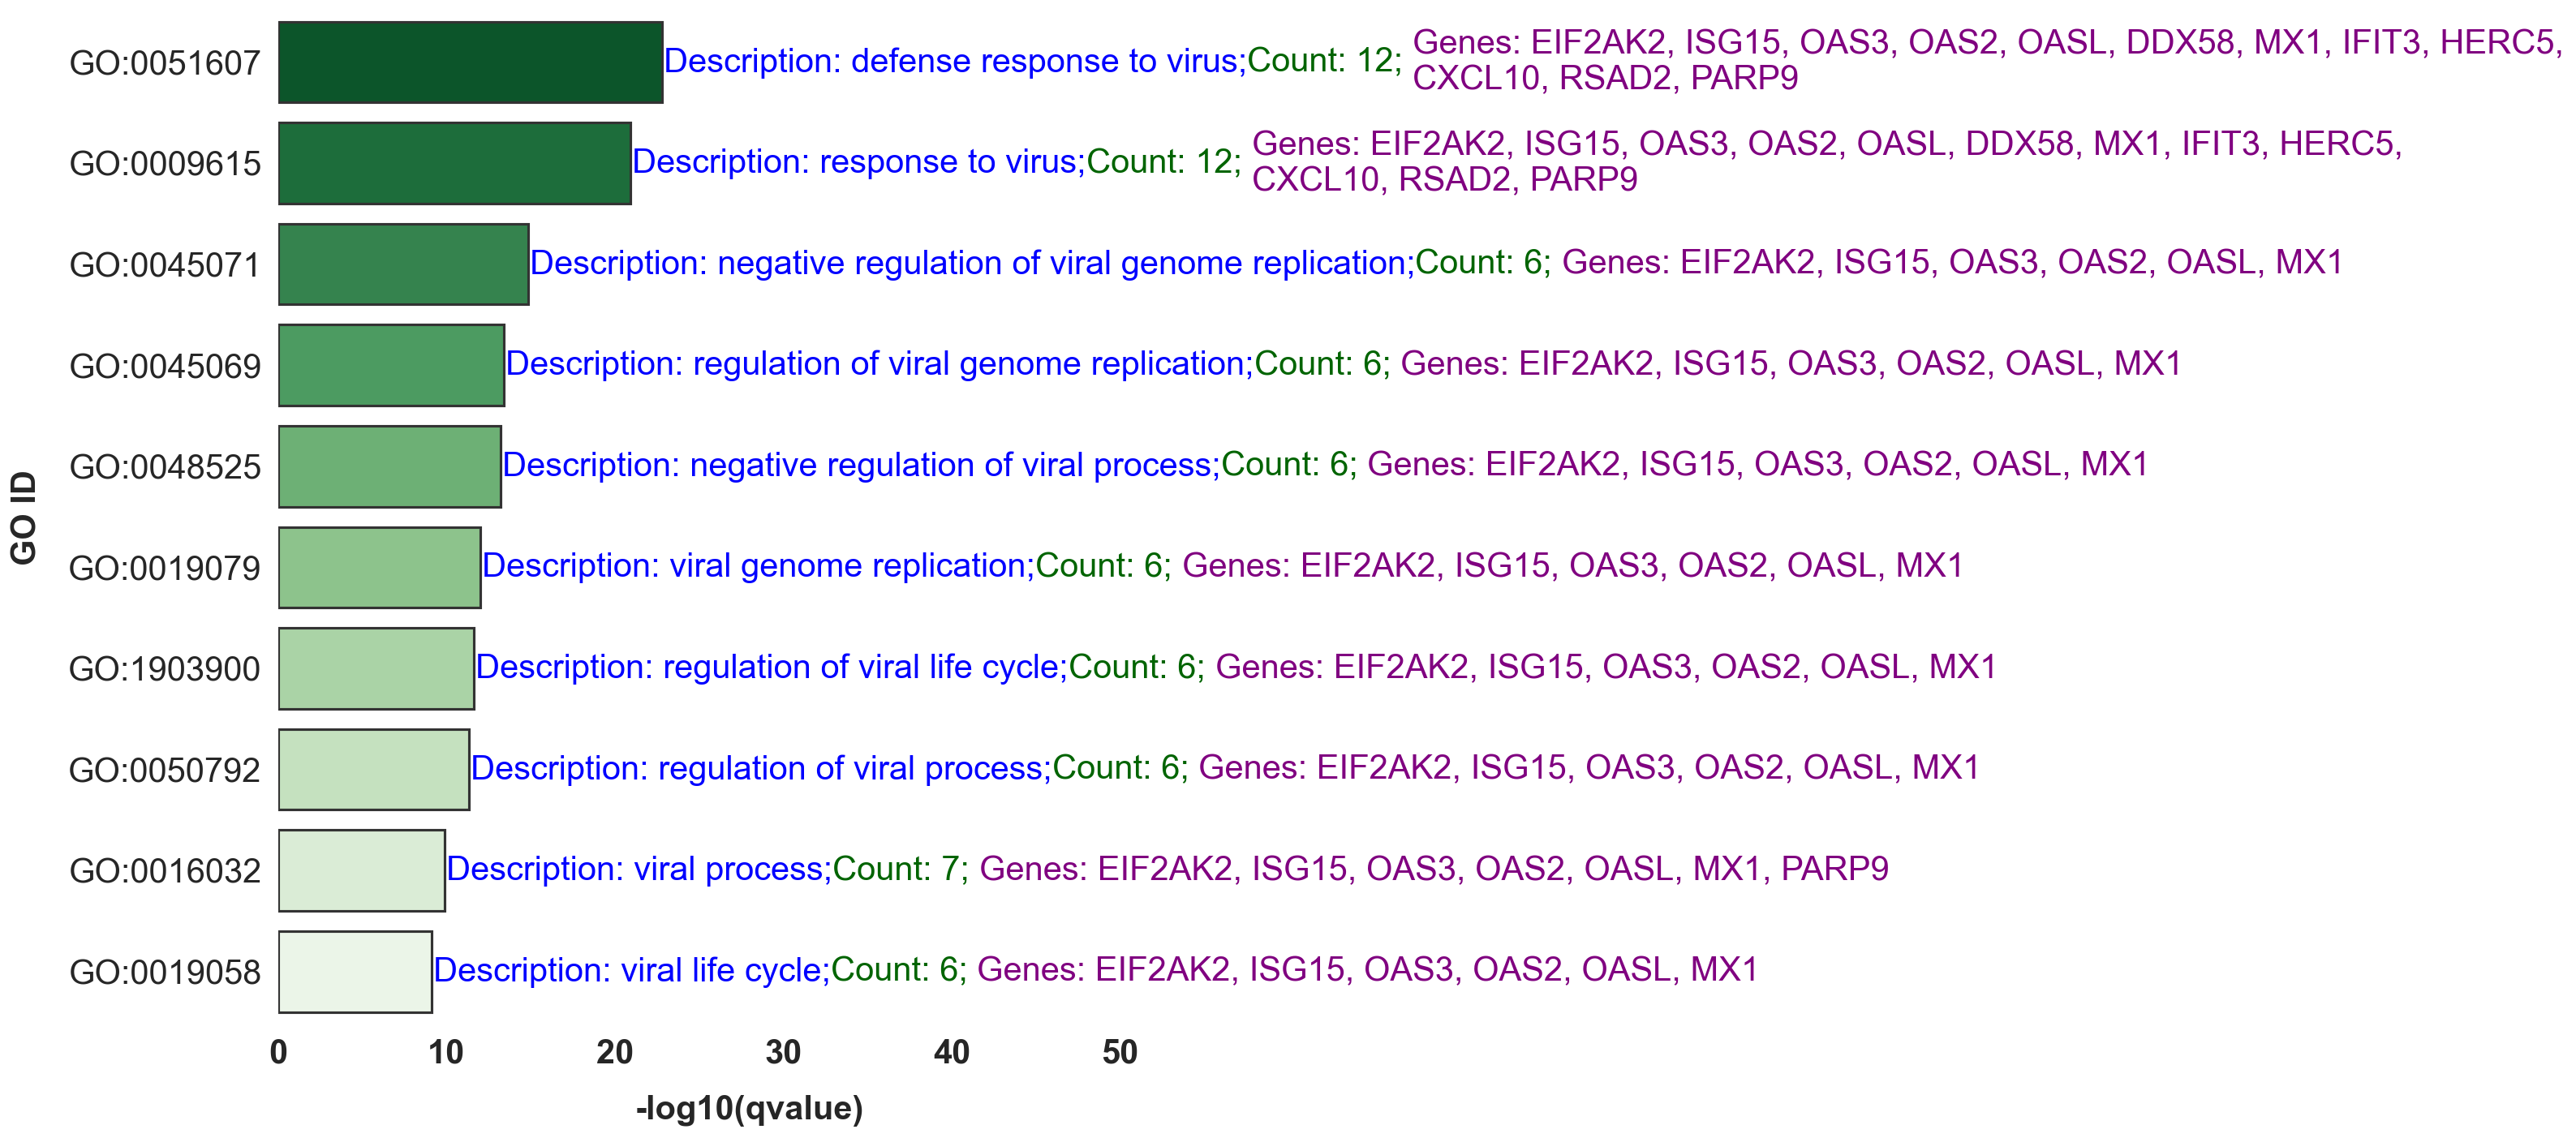

In [63]:
import pandas as pd


# Load the DataFrames
GO_IAV_24 = pd.read_csv('Detailed_GO_Upregulated_mock_none_24_vs_IAV_none_24.csv')
GO_PIV3_24 = pd.read_csv('Detailed_GO_Upregulated_mock_none_24_vs_PIV3_none_24.csv')

# Merge the DataFrames on 'ID'
merged_df = pd.merge(GO_IAV_24, GO_PIV3_24, on='ID', suffixes=('_IAV', '_PIV'))

# Select common description and find intersecting genes
merged_df['Description'] = merged_df['Description_IAV']  
merged_df['GeneSymbols'] = merged_df.apply(
    lambda row: ','.join(set(row['GeneSymbols_IAV'].split(',')) & set(row['GeneSymbols_PIV'].split(','))),
    axis=1
)

# Count the number of common genes for each ID
merged_df['Count'] = merged_df['GeneSymbols'].apply(lambda x: len(x.split(',')))

# Include q-values in the resulting DataFrame
merged_df['qvalue for IAV'] = merged_df['qvalue_IAV']
merged_df['qvalue for PIV3'] = merged_df['qvalue_PIV']

# Resulting DataFrame with selected columns
result_df = merged_df[['ID', 'Description', 'GeneSymbols', 'qvalue for IAV', 'qvalue for PIV3', 'Count']]

# Filter for descriptions containing "virus" or "viral"
keywords = '|'.join(['virus', 'viral'])  # Creates a regex pattern 'virus|viral'
filtered_df = result_df[result_df['Description'].str.contains(keywords, case=False, na=False)]

# Reset the index and drop the old one
filtered_df = filtered_df.reset_index(drop=True)

filtered_df['qvalue']=filtered_df['qvalue for PIV3']


def insert_newlines(string, every=10):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, 1.1*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()



# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=filtered_df

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 55

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)


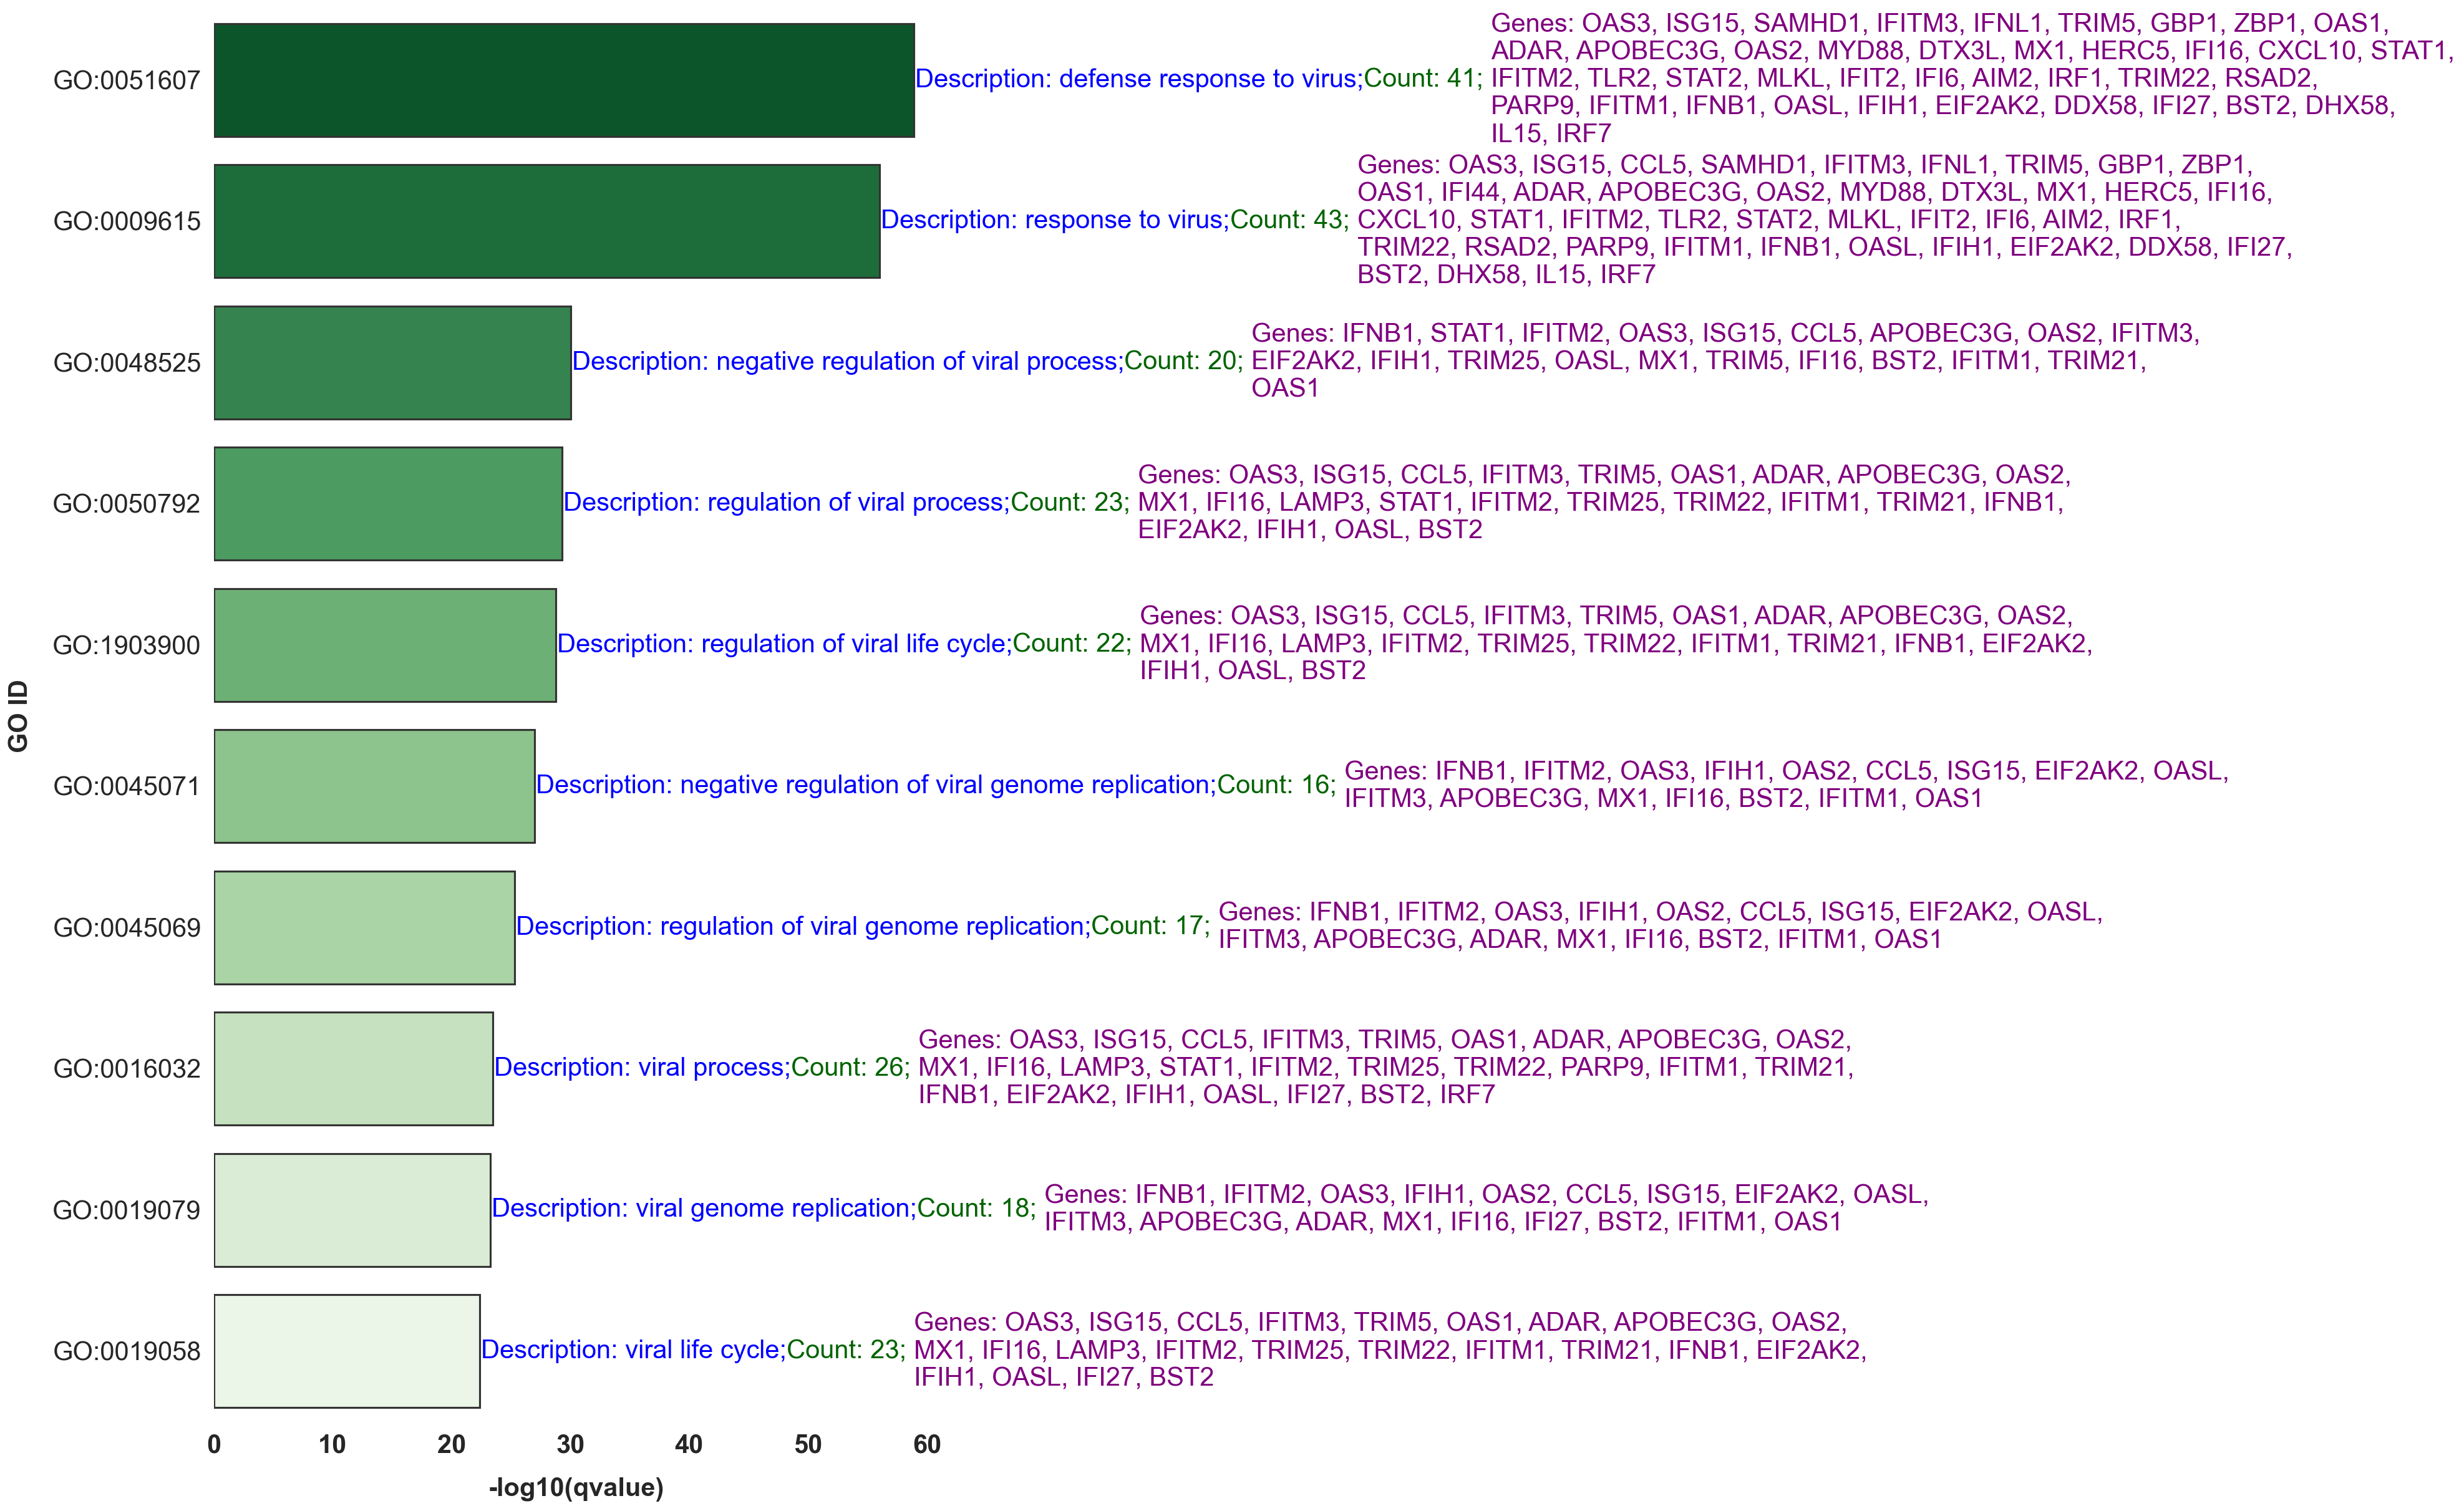

In [64]:
import pandas as pd


# Load the DataFrames
GO_IAV_72 = pd.read_csv('Detailed_GO_Upregulated_mock_none_72_vs_IAV_none_72.csv')
GO_PIV3_72 = pd.read_csv('Detailed_GO_Upregulated_mock_none_72_vs_PIV3_none_72.csv')

# Merge the DataFrames on 'ID'
merged_df = pd.merge(GO_IAV_72, GO_PIV3_72, on='ID', suffixes=('_IAV', '_PIV'))

# Select common description and find intersecting genes
merged_df['Description'] = merged_df['Description_IAV'] 
merged_df['GeneSymbols'] = merged_df.apply(
    lambda row: ','.join(set(row['GeneSymbols_IAV'].split(',')) & set(row['GeneSymbols_PIV'].split(','))),
    axis=1
)

# Count the number of common genes for each ID
merged_df['Count'] = merged_df['GeneSymbols'].apply(lambda x: len(x.split(',')))

# Include q-values in the resulting DataFrame
merged_df['qvalue for IAV'] = merged_df['qvalue_IAV']
merged_df['qvalue for PIV3'] = merged_df['qvalue_PIV']

# Resulting DataFrame with selected columns
result_df = merged_df[['ID', 'Description', 'GeneSymbols', 'qvalue for IAV', 'qvalue for PIV3', 'Count']]

# Filter for descriptions containing "virus" or "viral"
keywords = '|'.join(['virus', 'viral'])  # Creates a regex pattern 'virus|viral'
filtered_df = result_df[result_df['Description'].str.contains(keywords, case=False, na=False)]

# Reset the index and drop the old one
filtered_df = filtered_df.reset_index(drop=True)

filtered_df['qvalue']=filtered_df['qvalue for PIV3']


def insert_newlines(string, every=10):
    words = string.split()
    lines = [' '.join(words[i:i+every]) for i in range(0, len(words), every)]
    return '\n'.join(lines)

def plot_go_terms(df, regulation_type, max_log_pvalue, top_n=20):
    title = f"Top {top_n} Significant GO Terms for {regulation_type} Genes"
    significant_df = df[df['qvalue'] < 0.05].sort_values('qvalue').head(top_n)
    
    if significant_df.empty:
        print(f"No significant GO terms found for {regulation_type} genes.")
        return
    
    significant_df.reset_index(drop=True, inplace=True)
    significant_df['-log10(qvalue)'] = -np.log10(significant_df['qvalue'])
    
    fig, ax = plt.subplots(figsize=(10, 2*top_n), dpi=150)
    barplot = sns.barplot(data=significant_df, y='ID', x='-log10(qvalue)',
                          palette='Greens_r', edgecolor='.2', linewidth=1.5, ax=ax)
    
    ax.set_xlim(0, max_log_pvalue + 1)

    for index, row in significant_df.iterrows():
        description = insert_newlines(f"Description: {row['Description']}; ")
        count = f"Count: {row['Count']}; "
        genes = insert_newlines(f"Genes: {row['GeneSymbols']}")

        x_position = row['-log10(qvalue)'] + 0.1
        y_position = index

        description_text = ax.text(x_position, y_position, description,
                                   color='blue', va='center', fontsize=20, ha='left')

        description_text_width = description_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width
        
        count_text = ax.text(x_position + description_text_width, y_position, count,
                             color='darkgreen', va='center', fontsize=20, ha='left')

        count_text_width = count_text.get_window_extent(renderer=fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width

        ax.text(x_position + description_text_width + count_text_width, y_position, genes,
                color='purple', va='center', fontsize=20, ha='left')

    #ax.set_title(title, fontsize=25, pad=20, fontweight='bold', fontname='Arial')
    ax.set_xlabel('-log10(qvalue)', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    ax.set_ylabel('GO ID', fontsize=20, labelpad=15, fontweight='bold', fontname='Arial')
    plt.xticks(fontsize=20, fontweight='bold', fontname='Arial')
    plt.yticks(fontsize=20, fontname='Arial')
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    sns.despine(left=True, bottom=True)
    plt.tight_layout(pad=2)
    plt.show()


# New function to find maximum -log10(qvalue)
def find_max_log_qvalue(upregulated_df, downregulated_df=None):
    max_log_up = -np.log10(upregulated_df['qvalue']).max() if not upregulated_df.empty else 0
    max_log_down = -np.log10(downregulated_df['qvalue']).max() if downregulated_df is not None and not downregulated_df.empty else 0
    return max(max_log_up, max_log_down)

upregulated_df=filtered_df

# Determine the maximum -log10(qvalue) to normalize the x-axis
max_log_qvalue = 60

# Plot the figures for upregulated GO terms
plot_go_terms(upregulated_df, 'Upregulated', max_log_qvalue, top_n=10)
